In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn2pmml import sklearn2pmml, PMMLPipeline

In [ ]:
data = pd.read_csv('two_category.csv')
data = pd.get_dummies(data, columns=['classic_bluetooth'], prefix='classic_bluetooth')

X = np.stack(data[['packet_len', 'ad_cnt', 'classic_bluetooth_unknown', 'classic_bluetooth_yes', 'classic_bluetooth_no']].values)

# Label encoder
le = LabelEncoder()
device_type = le.fit_transform(data['label'])
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, device_type, test_size=0.2, random_state=42)

# Zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameters for SVM grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # only used when kernel is 'poly'
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5, 1.0],  # only significant for 'poly' and 'sigmoid'
}

# Grid search with cross-validation for SVM
grid = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

# Print out the best parameters
print('Best parameters found:\n', grid.best_params_)

# Predict using the model with the best parameters
y_pred = grid.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))

In [43]:
# Label encoder
le = LabelEncoder()
device_type = le.fit_transform(data['label'])
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, device_type, test_size=0.2, random_state=42)

# Zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a SVM classifier
clf = svm.SVC(C=10, coef0=0.1, degree=4,gamma='scale', kernel='poly')

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9453781512605042


In [ ]:
y_test_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

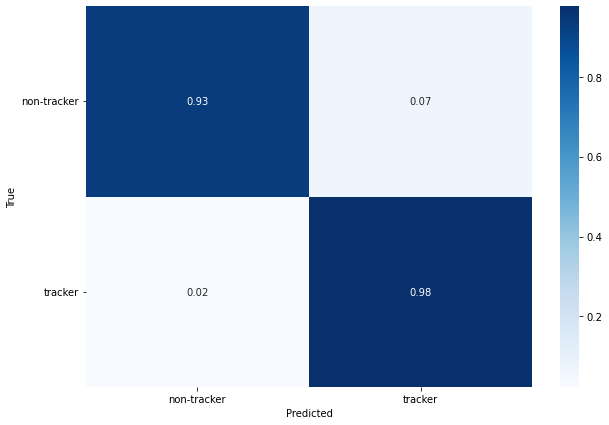

In [50]:
cm = confusion_matrix(y_test, y_test_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
class_names = ['non-tracker', 'tracker']
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.yticks(rotation=0) 
plt.show()

In [ ]:
unseen_data = pd.read_csv('two_category_unseen.csv')
X_unseen = np.stack(unseen_data[['packet_len', 'ad_cnt', 'bluetooth_unknown',  'bluetooth_yes', 'bluetooth_no']].values)
device_type_onehot = encoder.transform(unseen_data[['label']])
X_unseen = scaler.transform(X_unseen)
y_unseen = device_type_onehot

# Unseen devices test
y_pred = clf.predict(X_unseen)
y_unseen_label = np.argmax(y_unseen, axis=1)
score = accuracy_score(y_unseen_label, y_pred)
print(score)
print(classification_report(y_unseen_label, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
class_names = ['non-tracker', 'tracker']
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.yticks(rotation=0) 
plt.show()